In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [29]:
#Reading the DATA
train = pd.read_csv('../input/digit-recognizer/train.csv')
test= pd.read_csv('../input/digit-recognizer/test.csv')

My traning data for digit recognition

In [30]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [32]:
#Shape of data Train and Test
train.shape,test.shape

((42000, 785), (28000, 784))

<AxesSubplot:xlabel='label', ylabel='count'>

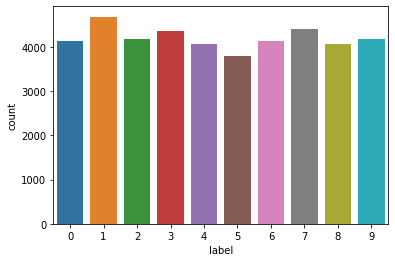

In [33]:
sns.countplot(x=train.label ,data=train)

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Okay! In our training data we have label, Now i  will seperate it into X and y variables:

In [34]:
X = train.drop('label',axis=1)
y = train['label']

In [35]:
#Now we will convert the labels intoOne-Hot representation:
y=pd.get_dummies(y)

In [36]:
print(y.iloc[:10:])

   0  1  2  3  4  5  6  7  8  9
0  0  1  0  0  0  0  0  0  0  0
1  1  0  0  0  0  0  0  0  0  0
2  0  1  0  0  0  0  0  0  0  0
3  0  0  0  0  1  0  0  0  0  0
4  1  0  0  0  0  0  0  0  0  0
5  1  0  0  0  0  0  0  0  0  0
6  0  0  0  0  0  0  0  1  0  0
7  0  0  0  1  0  0  0  0  0  0
8  0  0  0  0  0  1  0  0  0  0
9  0  0  0  1  0  0  0  0  0  0


Here I've scale the data inton 0 and 1.

In [37]:
X=X/255.0
test=test/255.0

In [38]:
#Reshaping the data for further model process
X = X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [39]:
#Shape of X,y and Test data
print(X.shape)
print(y.shape)
print(test.shape)

(42000, 28, 28, 1)
(42000, 10)
(28000, 28, 28, 1)


  Now i will apply train_test_split for spliting the training data into training and testing.

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [41]:
batch_size=25
epochs=20

# Neural Network with using  tensorflow Keras

In [42]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers.experimental import preprocessing

In [43]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=(28,28,1)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(units=100, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 28, 28, 100)       200       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 100)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 78400)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               7840100   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 7,841,310
Trainable params: 7,841,310
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.optimizer.lr=0.001

In [45]:
#Early stopping
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [46]:
rlrp=ReduceLROnPlateau(monitor='val_loss', patience=3,factor=0.5, min_lr=0.00001)

In [47]:
history_model = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=2,
    callbacks=[early_stopping,rlrp]
)

Epoch 1/20
1260/1260 - 4s - loss: 0.2769 - accuracy: 0.9166 - val_loss: 0.1816 - val_accuracy: 0.9453
Epoch 2/20
1260/1260 - 4s - loss: 0.1304 - accuracy: 0.9603 - val_loss: 0.1533 - val_accuracy: 0.9553
Epoch 3/20
1260/1260 - 4s - loss: 0.0925 - accuracy: 0.9709 - val_loss: 0.1124 - val_accuracy: 0.9662
Epoch 4/20
1260/1260 - 4s - loss: 0.0701 - accuracy: 0.9775 - val_loss: 0.1229 - val_accuracy: 0.9627
Epoch 5/20
1260/1260 - 4s - loss: 0.0559 - accuracy: 0.9818 - val_loss: 0.1196 - val_accuracy: 0.9692
Epoch 6/20
1260/1260 - 4s - loss: 0.0488 - accuracy: 0.9838 - val_loss: 0.1165 - val_accuracy: 0.9669


Here we can see that the model converges at around 0.96 val_accuracy score (different results may occur at each run, due to the randomization of the initial parameters).

Let's also take a look at the loss and accuracy values at each epoch. However, since we will do the same for each model in the notebook, we will first create a helper function for it.

In [48]:
#Let's plot the curve for loss,val_loss,accuracy,val_accuracy
def plot_loss_nd_accuracy(history):
    history_df=pd.DataFrame(history)
    history_df.loc[0:,['loss','val_loss']].plot()
    history_df.loc[0:,['accuracy','val_accuracy']].plot()

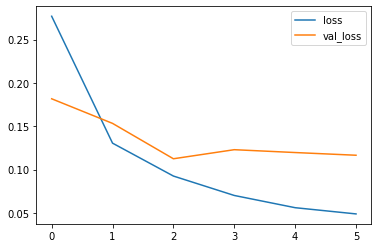

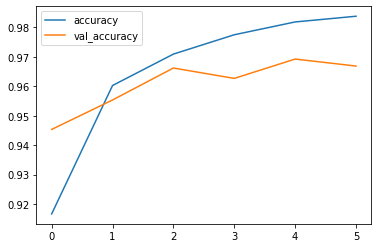

In [49]:
plot_loss_nd_accuracy(history_model.history)

# Buliding a Convolutional Neural Network (CNN) using Keras
A convolutional neural network (CNN) is a type of artificial neural network used in image recognition and processing that is specifically designed to process pixel data.

CNNs are used for image classification and recognition because of its high accuracy. ... The CNN follows a hierarchical model which works on building a network, like a funnel, and finally gives out a fully-connected layer where all the neurons are connected to each other and the output is processed.

# #The Model
I am using a convolutional neural network with the following architecture:

1)InputLayer(28, 28, 1)

2)Preprocessing

3)Conv2D(kernel_size=3, filters=32, activation='relu')

4)BatchNormalization

5)Conv2D(kernel_size=3, filters=64, activation='relu')

6)BatchNormalization

7)Conv2D(kernel_size=5, filters=128, activation='relu')

8)BatchNormalization

9)Conv2D(kernel_size=5, filters=128, activation='relu')

10)MaxPool2D

11)BatchNormalization

12)Flatten

13Dense(units=1024,activation='relu')

14)Dense(units=10, activation='softmax'

In [50]:
# Building the model
model_cnn = keras.Sequential([
    layers.InputLayer(input_shape=[28,28,1]),
    preprocessing.RandomContrast(0.2),
    preprocessing.RandomTranslation(height_factor=0.1,width_factor=0.1),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.BatchNormalization(axis=1),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.BatchNormalization(axis=1),
    layers.Conv2D(filters=128, kernel_size=5, activation='relu'),
    layers.BatchNormalization(axis=1),
    layers.Conv2D(filters=128, kernel_size=5, activation='relu'),
    layers.MaxPool2D(),
    layers.BatchNormalization(axis=1),
    layers.Flatten(),
    layers.Dense(units=1024,activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

In [51]:
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_contrast_1 (RandomCon (None, 28, 28, 1)         0         
_________________________________________________________________
random_translation_1 (Random (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 32)        104       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 64)        96        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 128)      

In [52]:
model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_cnn.optimizer.lr=0.001

Fitting the same data to cnn

In [53]:
history_model = model_cnn.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=2,
    callbacks=[early_stopping,rlrp]
)

Epoch 1/20
1260/1260 - 53s - loss: 0.2865 - accuracy: 0.9233 - val_loss: 0.0690 - val_accuracy: 0.9777
Epoch 2/20
1260/1260 - 52s - loss: 0.1039 - accuracy: 0.9699 - val_loss: 0.0924 - val_accuracy: 0.9722
Epoch 3/20
1260/1260 - 52s - loss: 0.0794 - accuracy: 0.9774 - val_loss: 0.0623 - val_accuracy: 0.9826
Epoch 4/20
1260/1260 - 52s - loss: 0.0648 - accuracy: 0.9809 - val_loss: 0.0380 - val_accuracy: 0.9872
Epoch 5/20
1260/1260 - 52s - loss: 0.0611 - accuracy: 0.9817 - val_loss: 0.0320 - val_accuracy: 0.9908
Epoch 6/20
1260/1260 - 52s - loss: 0.0509 - accuracy: 0.9849 - val_loss: 0.0303 - val_accuracy: 0.9904
Epoch 7/20
1260/1260 - 52s - loss: 0.0483 - accuracy: 0.9861 - val_loss: 0.0426 - val_accuracy: 0.9876
Epoch 8/20
1260/1260 - 52s - loss: 0.0351 - accuracy: 0.9888 - val_loss: 0.0322 - val_accuracy: 0.9907
Epoch 9/20
1260/1260 - 52s - loss: 0.0405 - accuracy: 0.9882 - val_loss: 0.0324 - val_accuracy: 0.9909


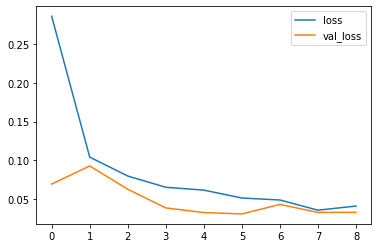

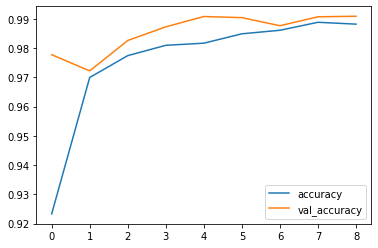

In [54]:
plot_loss_nd_accuracy(history_model.history)

We can see that the validation and training data seem to converge together this time, which implies that we have solved the main causes of overfitting.

In [56]:
predictions = model_cnn.predict(test)
results = predictions.argmax(axis=-1)

In [57]:
result = pd.DataFrame()
result['ImageId'] = list(range(1,28001))
result['Label'] = results
result.to_csv("Cnn_model.csv", index = False)